In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and di

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
cd /content/drive/MyDrive/안봐도보이조_project

/content/drive/.shortcut-targets-by-id/1SJQekhA0CeMNytl0fjgy05kskJWHvJRt/안봐도보이조_project


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import glob

In [4]:
model = load_model('./김강산/model/ResNet_1.h5')

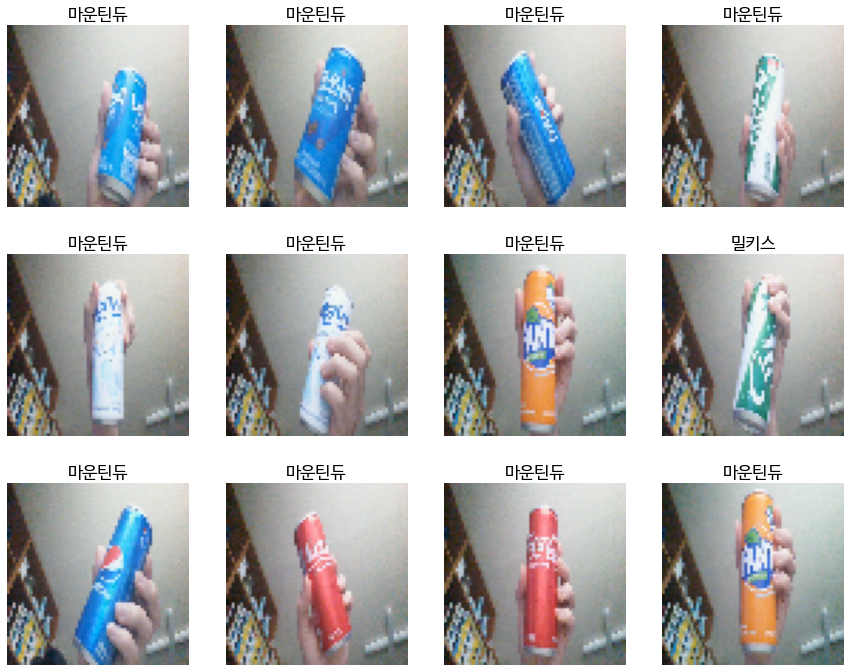

In [5]:
# 직접 찍은 음료 이미지로 예측 결과 확인

class_dict = {0:'갈아만든배', 1:'레쓰비', 2:'마운틴듀', 3:'밀키스', 4:'스프라이트', 5:'칠성사이다', 6:'코카콜라', 7:'트로피카나망고', 8:'펩시콜라', 9:'환타오렌지'}

fig = plt.figure(figsize=(15,15))
i=0
for img in glob.glob('./test_real/*.jpg'):
    ax = plt.subplot(3,4,i+1) 
    test_img = cv2.imread(img)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(64,64))/255.0
    test_img_input = test_img.reshape((1,)+test_img.shape)
    pred = model.predict(test_img_input)
    pred_class = class_dict[np.argmax(pred, axis=1)[0]]
    ax.imshow(test_img)
    ax.axis('off')
    ax.set_title(f'{pred_class}',fontsize=17)
    i += 1
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.7, wspace=0.2, hspace=0.2)
plt.show()

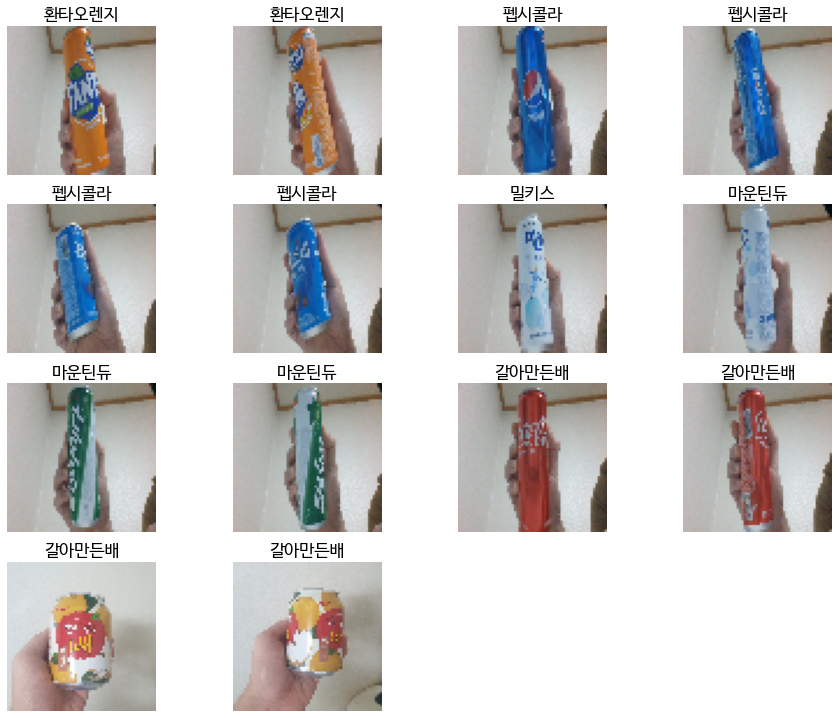

In [7]:
class_dict = {0:'갈아만든배', 1:'레쓰비', 2:'마운틴듀', 3:'밀키스', 4:'스프라이트', 5:'칠성사이다', 6:'코카콜라', 7:'트로피카나망고', 8:'펩시콜라', 9:'환타오렌지'}

fig = plt.figure(figsize=(15,15))
i=0
for img in glob.glob('./final_test_img/*.jpg'):
    ax = plt.subplot(5,4,i+1) 
    test_img = cv2.imread(img)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(64,64))/255.0
    test_img_input = test_img.reshape((1,)+test_img.shape)
    pred = model.predict(test_img_input)
    pred_class = class_dict[np.argmax(pred, axis=1)[0]]
    ax.imshow(test_img)
    ax.axis('off')
    ax.set_title(f'{pred_class}',fontsize=17)
    i += 1
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
plt.show()